In [80]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [81]:
#import the data
Dataset= pd.read_csv("Titanic-Dataset.csv")

In [82]:
#Understand the data
#A preview
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
#Preview of the dataset
#Pclass:1 = First class 2 = Second class 3 = Third class
#SibSp: No. of siblings / spouses aboard the Titanic
#Parch:No. of parents / children aboard the Titanic
#Emabarked :

In [84]:
Dataset.shape

(891, 12)

In [85]:
Dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
#We can see that the average age of passengers on the titanic was 14-15 years old 
#Possibility of outliers present for age which moght affect our results
#We are looking at the ratio of survivors 


In [88]:
Dataset["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [89]:
#As we can see , 38% of the passengers survived while 62% didnt 
#The class isnt heavily imbalance in fact we have a balanced class

In [90]:
#Looking at the dataset to determine if we are dealing with messy data or not
print(Dataset.head(20))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.

In [91]:
#Looking at the number of unique variables
Dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [92]:
#From what I see, 'There are people with the same tickets , they might be family 
#People who shared a cabin
#Name and passengerId have 891 unique variable

In [93]:
#Observation
#The data seems to be clean data , the only thing that we seem to have is null values and features that might not help us indicate whether the passenger was more likely ro survive or mot
#Name might not be helpful at all and  passengeerID
#We can see that some features have null values , like cabin and age
#We are going to remove irreleveant columns and nulll values

In [94]:
Dataset.drop(columns=["PassengerId","Name"], inplace=True)

In [95]:
Dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [96]:
#lookinng if there are null values
Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [97]:
#Looking at the  number of null values
# With age we can just fill the null value with the mean ince it is a quantitu=ive variable, the missingness might not indicate anything
#With cabin we see that the there are more missing values than input values, but we think cabin is important , so since there are people who share the same ticket we will give them the same cabin and we will see how many nulls are lefts
#Embarked has only 2 missing values , so we are going to replace it with the mode since it is a qualitative variable

In [98]:
Dataset.Age= Dataset.Age.fillna(Dataset.Age.mean())

In [99]:
Dataset.fillna({"Embarked": Dataset["Embarked"].mode()[0]}, inplace=True)

In [100]:
Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [101]:
Dataset["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [102]:
Dataset['Cabin'] = Dataset.groupby('Ticket')['Cabin'].transform(
    lambda x: x.fillna(x.dropna().iloc[0] if x.dropna().size > 0 else np.nan)
)

C:\Users\Tatiana\AppData\Local\Temp\ipykernel_23700\1924580714.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.dropna().iloc[0] if x.dropna().size > 0 else np.nan)


In [103]:
Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       676
Embarked      0
dtype: int64

In [104]:
#We can see that the number of null for the cabin decreased by 11
#The missing values we are going to leave it as we are not going to use cabin alone since it wont really give us insight but we weill separate it into deck letter and number

In [105]:
Dataset["Deck"] = Dataset["Cabin"].str[0]

In [106]:
Dataset["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        4
B51 B53 B55    3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [107]:
Dataset["CabinNum"] = Dataset["Cabin"].str[1:]

In [108]:
Dataset["Deck"].value_counts()


Deck
C    67
B    48
D    33
E    33
A    15
F    14
G     4
T     1
Name: count, dtype: int64

In [109]:
Dataset["CabinNum"].value_counts().head(20)

CabinNum
33            7
6             6
2             5
101           5
49            5
20            5
77            4
23 C25 C27    4
7             4
36            4
35            4
              4
46            4
22 C26        4
50            4
96 B98        4
5             3
4             3
26            3
86            3
Name: count, dtype: int64

In [110]:

Dataset['CabinNum'] = Dataset['CabinNum'].astype(str)
split_data = Dataset['CabinNum'].str.split(' ', expand=True)
Dataset['CabinNum'] = np.where(
    #Check if a split actually occurred
    split_data[1].notna(),
    # If a split occurred that the second part and only take the numbers
    split_data[1].str[1:],
    # If no split occurred, keep the original value
    split_data[0]
)

In [111]:
Dataset['CabinNum'].value_counts().head(20)

CabinNum
nan    676
33       7
26       7
25       6
6        6
2        5
101      5
49       5
20       5
46       4
98       4
7        4
35       4
77       4
36       4
50       4
         4
19       3
5        3
64       3
Name: count, dtype: int64

In [112]:
Dataset= Dataset[Dataset["CabinNum"].str.strip() != ""].copy()

In [113]:
Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       676
Embarked      0
Deck        676
CabinNum      0
dtype: int64

In [114]:
Dataset.fillna({"Deck": "unknown"}, inplace=True)


In [115]:
Dataset.fillna({"CabinNum": 0}, inplace=True)

In [116]:
#We are going to remove cabin and ticket since we are done
Dataset.drop(columns=["Cabin","Ticket"], inplace=True)

<Axes: ylabel='Fare'>

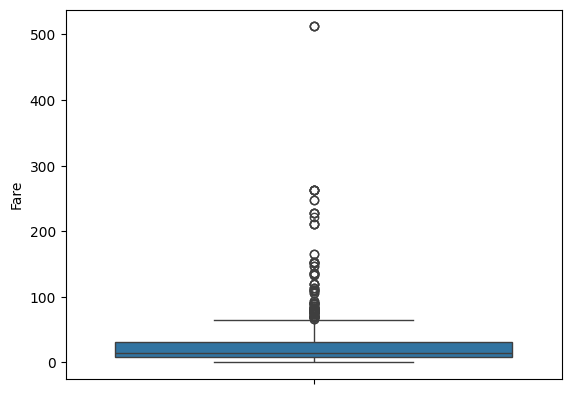

In [117]:
#Identifying outliers
sns.boxplot(Dataset["Fare"])

<Axes: ylabel='Age'>

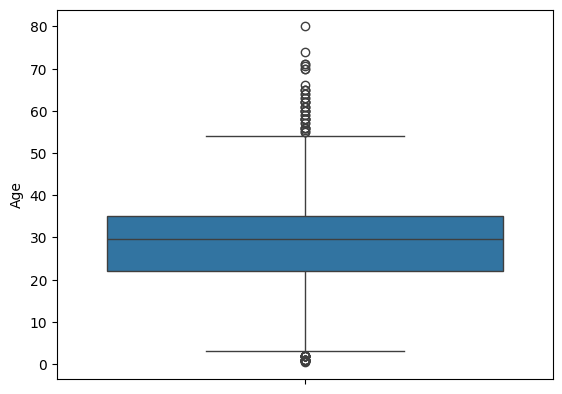

In [118]:
sns.boxplot(Dataset["Age"])

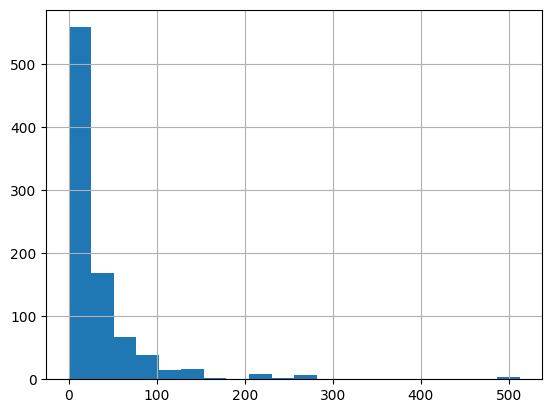

In [119]:
Dataset["Fare"].hist(bins=20)
plt.show()

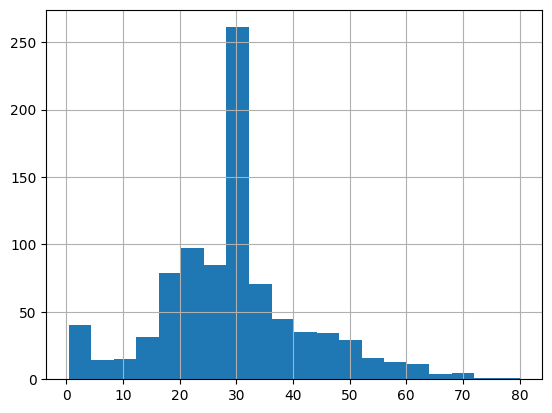

In [120]:
Dataset["Age"].hist(bins=20)
plt.show()

In [121]:
#We can tell that there are outliers in fare , since it is skewed to the right and for age it seems normally disturbuted due to its bellshape like figure
# We are not going to deal with the outliers cause the outliers might have meaning 

In [122]:
#Feature engineering
#Data visualization
Dataset["Fam"]=Dataset["SibSp"]+Dataset["Parch"]

In [123]:
Dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,CabinNum,Fam
0,0,3,male,22.0,1,0,7.2500,S,unknown,nan,1
1,1,1,female,38.0,1,0,71.2833,C,C,85,1
2,1,3,female,26.0,0,0,7.9250,S,unknown,nan,0
3,1,1,female,35.0,1,0,53.1000,S,C,123,1
4,0,3,male,35.0,0,0,8.0500,S,unknown,nan,0


In [124]:
Dataset['Embarked'].unique()
Dataset['Deck'].unique()

array(['unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [125]:
#We want to see the degree of correlation between survived and other features
#In order to do that we need do make the binary variables that are string type into int
Dataset['Sex_int'] = Dataset['Sex'].map({'male': 0, 'female': 1})
Dataset['Embarked_int'] = Dataset['Embarked'].map({'C': 0, 'S': 1,"Q":2})
Dataset['Deck_int'] = Dataset['Deck'].map({'unknown':0, 'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8})




<Axes: >

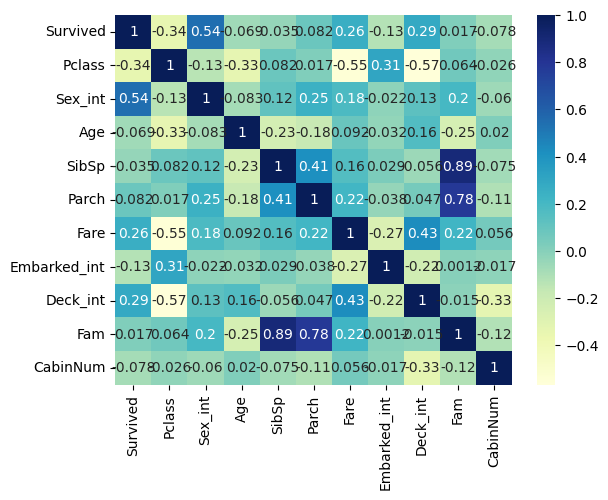

In [127]:
sns.heatmap(
    Dataset[["Survived","Pclass","Sex_int","Age","SibSp","Parch","Fare","Embarked_int","Deck_int","Fam","CabinNum"]]
    .corr(),
    annot=True,
    cmap="YlGnBu"
)


In [128]:
#As we can see that there is a moderately positive correlation with sex and survival , showing that sex impacted the survival rate and if you were female you were more likely to survive
#Followed by Pclass , there is a moderately negative correlation, showing that if you were in first class you were more likely to surive
#From this we can see that the deck you were in , the fare, impacted the surival rate while age and other features barely imapcted the survival rate

In [129]:
#Looking at the survival percentage per gender ,Pclass,Embarked and Deck and their associated bar plot
Dataset.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.189565
Name: Survived, dtype: float64

In [130]:

def plotting(x_title,title,size):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, size)
    sns.barplot(data=Dataset, x=x_title, y="Survived")
    plt.title(title)
    plt.show()


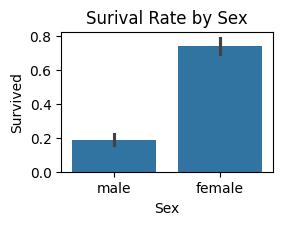

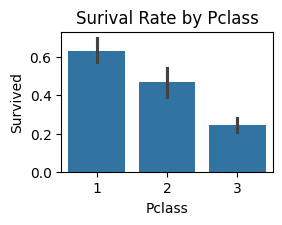

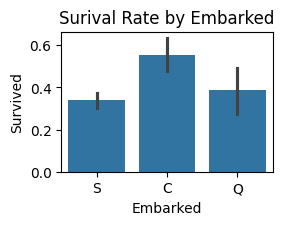

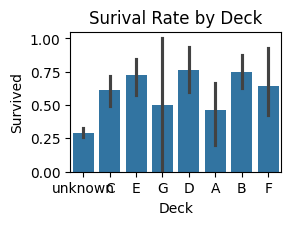

In [131]:
plotting("Sex","Surival Rate by Sex",1)
plotting("Pclass","Surival Rate by Pclass",2)
plotting("Embarked","Surival Rate by Embarked",3)
plotting("Deck","Surival Rate by Deck",4)

In [132]:
#Doing a logistic Regression
target="Survived"
features=["Pclass", "Sex", "Age", "SibSp", "Parch","Deck","Fare", "Embarked"]

X=Dataset[features]
y=Dataset[target]

#Preprocessing 
numeric_features=["Age","SibSp","Parch","Fare"]
categorical_features=["Pclass","Sex","Deck","Embarked"]

In [133]:
#removed features like CabinNum and fam since it only confused our model more

In [134]:
#Imputers and transformerss
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#For categorical: fill missing then one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
], remainder="drop")

#Full pipeline with logistic regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

#Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

#Fit model
model.fit(X_train, y_train)

#Predictions and metrics
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7882882882882883

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       137
           1       0.73      0.71      0.72        85

    accuracy                           0.79       222
   macro avg       0.78      0.77      0.77       222
weighted avg       0.79      0.79      0.79       222

ROC AUC: 0.831987977672821



Confusion Matrix (Validation Set):


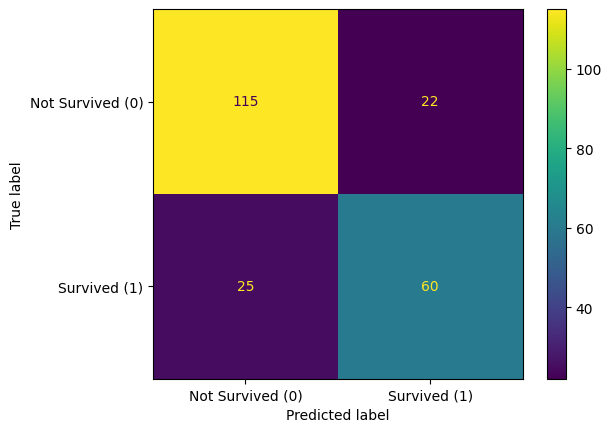

In [135]:
print("\nConfusion Matrix (Validation Set):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived (0)', 'Survived (1)'])
disp.plot()
plt.show()